<a href="https://colab.research.google.com/github/miguel-kjh/Malaria_cell_detector./blob/master/Malaria_cell_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import *
from keras.layers import *
from keras.applications import VGG16
from keras import layers
from keras import optimizers
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
def generatePlot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
   
  epochs = range(len(acc))
   
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
   
  plt.figure()
   
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
   
  plt.show()
  
def fit_validation(model,train,validation,epochs=15):
  return model.fit_generator(
            train,
            steps_per_epoch=train.samples // batch_size,
            epochs=epochs, 
            validation_data=validation,
            validation_steps=validation.samples // batch_size)
  

# Se monta el directorio 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Comprobación de datos

C100P61ThinF_IMG_20150918_144104_cell_128.png
C100P61ThinF_IMG_20150918_144104_cell_131.png
C100P61ThinF_IMG_20150918_144104_cell_144.png
C100P61ThinF_IMG_20150918_144104_cell_21.png
C100P61ThinF_IMG_20150918_144104_cell_25.png


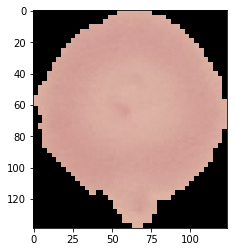

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Cell malaria/Uninfected" | head -5
pil_im_uninfected = Image.open('/content/drive/My Drive/Colab Notebooks/Cell malaria/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png', 'r')
plt.imshow(np.asarray(pil_im_uninfected))

C100P61ThinF_IMG_20150918_144104_cell_162.png
C100P61ThinF_IMG_20150918_144104_cell_163.png
C100P61ThinF_IMG_20150918_144104_cell_164.png
C100P61ThinF_IMG_20150918_144104_cell_165.png
C100P61ThinF_IMG_20150918_144104_cell_166.png


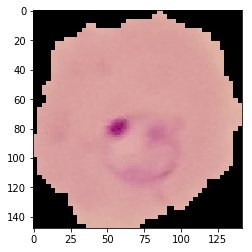

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Cell malaria/Parasitized" | head -5
pil_im_infected = Image.open('/content/drive/My Drive/Colab Notebooks/Cell malaria/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', 'r')
plt.imshow(np.asarray(pil_im_infected))

# Generación de Imagenes

In [6]:
image_size=50
data_dir = '/content/drive/My Drive/Colab Notebooks/Cell malaria'
batch_size = 16
datagen = ImageDataGenerator(rescale = 1/255.,
                             horizontal_flip = True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range = 0.3,
                             rotation_range = 30,
                             validation_split=0.1
                            )

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary',
        subset="training")

validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary',
        subset="validation")

Found 9003 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


#Uso de la Red VGG16

## *Cargamos la VGG16 y congelamos sus pesos*

In [7]:
vgg_conv = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(image_size, image_size, 3))

for layer in vgg_conv.layers[:7]:
    layer.trainable = False
    
for layer in vgg_conv.layers[11:]:
    layer.trainable = False

    
    
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
vgg_conv.summary()

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f527d5c54e0> False
<keras.layers.convolutional.Conv2D object at 0x7f527d5c5940> False
<keras.layers.convolutional.Conv2D object at 0x7f527d5c5e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f527071d6a0> False
<keras.layers.convolutional.Conv2D object at 0x7f527071d588> False
<keras.layers.convolutional.Conv2D object at 0x7f52706da4a8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f52706b5b70> False
<keras.layers.convolutional.Conv2D object at 0x7f52706b56d8> True
<keras.layers.convolutional.Conv2D object at 0x7f5270757390> True
<keras.layers.convolutional.Conv2D object at 0x7f5270742dd8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f52705576d8> True
<keras.layers.convolutional.Conv2D object at 0x7f5270557208> False
<keras.layers.convolutional.Conv2D object at 0x7f52704f63c8> 

## RED NEURONAL(capa densa)

In [8]:
x = Flatten()(vgg_conv.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)
model_vgg16 = Model(inputs = vgg_conv.input, outputs = x)
 

model_vgg16.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
___________________________

## Compilación y Entrenamiento

In [0]:
model_vgg16.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
print("Compilado...")


# TRAINING --------------------------------------------------

epochs = 15
history_model_vgg16 = fit_validation(model_vgg16,train_generator,validation_generator)

Compilado...
Epoch 1/15
562/562 [==============================] - 70s 124ms/step - loss: 0.3857 - acc: 0.8098 - val_loss: 0.2066 - val_acc: 0.9304
Epoch 2/15
562/562 [==============================] - 63s 111ms/step - loss: 0.2223 - acc: 0.9239 - val_loss: 0.1907 - val_acc: 0.9309
Epoch 3/15
562/562 [==============================] - 64s 114ms/step - loss: 0.2138 - acc: 0.9247 - val_loss: 0.2627 - val_acc: 0.8902
Epoch 4/15
562/562 [==============================] - 59s 106ms/step - loss: 0.2180 - acc: 0.9220 - val_loss: 0.1901 - val_acc: 0.9228
Epoch 5/15
562/562 [==============================] - 58s 102ms/step - loss: 0.2134 - acc: 0.9259 - val_loss: 0.1827 - val_acc: 0.9228
Epoch 6/15
562/562 [==============================] - 58s 104ms/step - loss: 0.2063 - acc: 0.9288 - val_loss: 0.1685 - val_acc: 0.9421
Epoch 7/15
562/562 [==============================] - 58s 103ms/step - loss: 0.1982 - acc: 0.9279 - val_loss: 0.1921 - val_acc: 0.9319
Epoch 8/15
562/562 [======================

# Red convolutiva, propia

In [11]:
#creating sequential model
model_conv=Sequential()
model_conv.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(image_size,image_size,3)))
model_conv.add(MaxPooling2D(2,2))

model_conv.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model_conv.add(MaxPooling2D(2,2))

model_conv.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model_conv.add(MaxPooling2D(2,2))

model_conv.add(Flatten())
model_conv.add(Dense(256,activation="relu"))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(1,activation="sigmoid"))
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

##      Compilación y Entramiento

In [12]:
model_conv.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
print("Compilado...")


# TRAINING --------------------------------------------------

history = fit_validation(model_conv,train_generator,validation_generator)

Compilado...
Epoch 1/15
562/562 [==============================] - 41s 73ms/step - loss: 0.5624 - acc: 0.6902 - val_loss: 0.2910 - val_acc: 0.8730
Epoch 2/15
562/562 [==============================] - 38s 67ms/step - loss: 0.2985 - acc: 0.8854 - val_loss: 0.2849 - val_acc: 0.8963
Epoch 3/15
562/562 [==============================] - 39s 70ms/step - loss: 0.2880 - acc: 0.8918 - val_loss: 0.2621 - val_acc: 0.8740
Epoch 4/15
562/562 [==============================] - 38s 67ms/step - loss: 0.2522 - acc: 0.9071 - val_loss: 0.2141 - val_acc: 0.9228
Epoch 5/15
562/562 [==============================] - 39s 70ms/step - loss: 0.2645 - acc: 0.9039 - val_loss: 0.2417 - val_acc: 0.9024
Epoch 6/15
562/562 [==============================] - 38s 67ms/step - loss: 0.2372 - acc: 0.9143 - val_loss: 0.2207 - val_acc: 0.9157
Epoch 7/15
562/562 [==============================] - 39s 70ms/step - loss: 0.2407 - acc: 0.9155 - val_loss: 0.2134 - val_acc: 0.9278
Epoch 8/15
562/562 [=============================

# Interpretación de datos

Red Convolutiva con los pesos de la vgg16


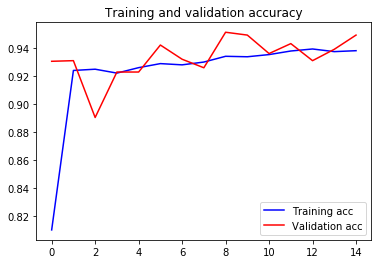

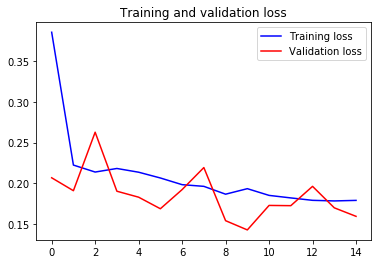

In [0]:
print("Red Convolutiva con los pesos de la vgg16")
generatePlot(history_model_vgg16)

Red Convolutiva propia


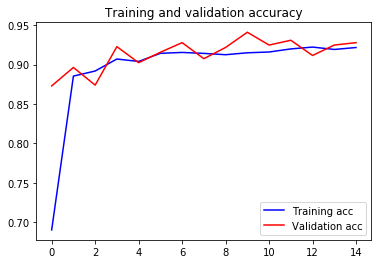

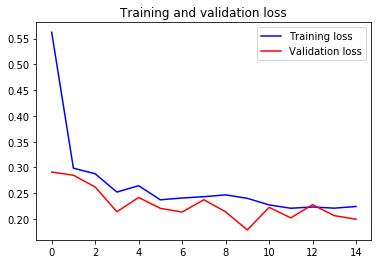

In [13]:
print("Red Convolutiva propia")
generatePlot(history)

# Guardar los modelos

In [0]:
model_conv.save('/content/drive/My Drive/IA notebook/models/CNN_malaria.h5')
model_vgg16.save('/content/drive/My Drive/IA notebook/models/VGG16_malaria.h5')